In [1]:

import numpy as np
from sklearn.ensemble import RandomForestRegressor
# for plotting
import matplotlib.pyplot as plt

import sys
sys.path.append('./Classes/')
# import various AL strategies
from modelUtils.active_learner import ActiveLearnerRandom
from modelUtils.active_learner import ActiveLearnerUncertainty
from modelUtils.active_learner import ActiveLearnerLAL
# import the dataset class
from modelUtils.dataset import DatasetCheckerboard2x2
from modelUtils.dataset import DatasetCheckerboard4x4
from modelUtils.dataset import DatasetRotatedCheckerboard2x2
from modelUtils.dataset import DatasetStriatumMini
from modelUtils.dataset import DatasetCheckerboard4X4_Own
# import the model for LAL strategy
from modelUtils.lal_model import LALmodel
# import Experiment and Result classes that will be responsible for running AL and saving the results
from modelUtils.experiment import Experiment
from modelUtils.results import Results

In [2]:
#fn = 'LAL-randomtree-simulatedunbalanced-big.npz'
fn = 'LAL-randomtree-simulatedunbalanced-big.npz'
# we found these parameters by cross-validating the regressor and now we reuse these expreiments
parameters = {'est': 2000, 'depth': 40, 'feat': 6 }
filename = './regressionData/'+fn
regression_data = np.load(filename)
regression_features = regression_data['arr_0']
regression_labels = regression_data['arr_1']

print('Building lal regression model..')
lalModel1 = RandomForestRegressor(n_estimators = parameters['est'], max_depth = parameters['depth'], 
                                 max_features=parameters['feat'], oob_score=True, n_jobs=8)

lalModel1.fit(regression_features, np.ravel(regression_labels))    

print('Done!')
print('Oob score = ', lalModel1.oob_score_)


#fn = 'LAL-iterativetree-simulatedunbalanced-big.npz'
fn = 'LAL-iterativetree-simulatedunbalanced-big.npz'
# we found these parameters by cross-validating the regressor and now we reuse these expreiments
parameters = {'est': 1000, 'depth': 40, 'feat': 6 }
filename = './regressionData/'+fn
regression_data = np.load(filename)
regression_features = regression_data['arr_0']
regression_labels = regression_data['arr_1']

print('Building lal regression model..')
lalModel2 = RandomForestRegressor(n_estimators = parameters['est'], max_depth = parameters['depth'], 
                                 max_features=parameters['feat'], oob_score=True, n_jobs=8)

lalModel2.fit(regression_features, np.ravel(regression_labels))    

print('Done!')
print('Oob score = ', lalModel1.oob_score_)

Building lal regression model..



 experiment #1
....................................................................................................
 experiment #2
....................................................................................................
 experiment #3
....................................................................................................
 experiment #4
....................................................................................................
 experiment #5
....................................................................................................
 experiment #6
....................................................................................................
 experiment #7
....................................................................................................
 experiment #8
....................................................................................................
 experiment #9
........................................................

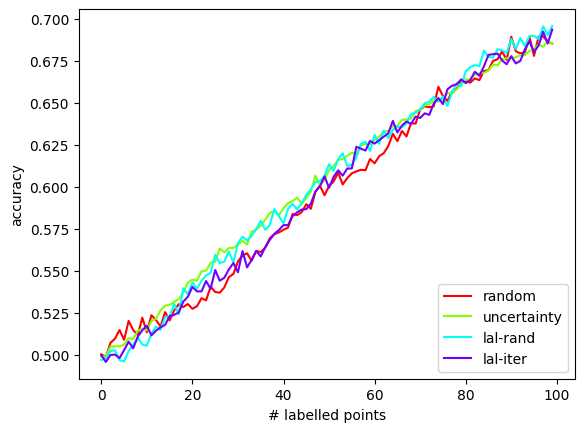

In [ ]:

#number of experiment repeats
nExperiments = 20
# number of estimators (random trees) in the classifier
nEstimators = 50
# number of labeled points at the beginning of the AL experiment
nStart = 2
# number of iterations in AL experiment
nIterations = 100
# the quality metrics computed on the test set to evaluate active learners
quality_metrics = ['accuracy']

# load dataset
dtst = DatasetCheckerboard4X4_Own()
# set the starting point
dtst.setStartState(nStart)
# Active learning strategies
alR = ActiveLearnerRandom(dtst, nEstimators, 'random')
alU = ActiveLearnerUncertainty(dtst, nEstimators, 'uncertainty')
alLALindepend = ActiveLearnerLAL(dtst, nEstimators, 'lal-rand', lalModel1)
alLALiterative = ActiveLearnerLAL(dtst, nEstimators, 'lal-iter', lalModel2)
als = [alR, alU, alLALindepend, alLALiterative]

exp = Experiment(nIterations, nEstimators, quality_metrics, dtst, als, 'here we can put a comment about the current experiments')
# the Results class helps to add, save and plot results of the experiments
res = Results(exp, nExperiments)

for i in range(nExperiments):
    print('\n experiment #'+str(i+1))
    # run an experiment
    performance = exp.run()
    res.addPerformance(performance)
    # reset the experiment (including sampling a new starting state for the dataset)
    exp.reset()

print()
res.saveResults('DatasetCheckerboard4X4_Own_author-exp')
res2plot = Results()
res2plot.readResult('DatasetCheckerboard4X4_Own_author-exp')
res2plot.plotResults(metrics = ['accuracy'])

In [8]:
#number of experiment repeats
nExperiments = 20
# number of estimators (random trees) in the classifier
nEstimators = 50
# number of labeled points at the beginning of the AL experiment
nStart = 2
# number of iterations in AL experiment
nIterations = 100
# the quality metrics computed on the test set to evaluate active learners
quality_metrics = ['accuracy']

# load dataset
dtst = DatasetCheckerboard2x2()
# set the starting point
dtst.setStartState(nStart)
# Active learning strategies
alR = ActiveLearnerRandom(dtst, nEstimators, 'random')
alU = ActiveLearnerUncertainty(dtst, nEstimators, 'uncertainty')
alLALindepend = ActiveLearnerLAL(dtst, nEstimators, 'lal-rand', lalModel1)
alLALiterative = ActiveLearnerLAL(dtst, nEstimators, 'lal-iter', lalModel2)
als = [alR, alU, alLALindepend, alLALiterative]

exp = Experiment(nIterations, nEstimators, quality_metrics, dtst, als, 'here we can put a comment about the current experiments')
# the Results class helps to add, save and plot results of the experiments
res = Results(exp, nExperiments)

for i in range(nExperiments):
    print('\n experiment #'+str(i+1))
    # run an experiment
    performance = exp.run()
    res.addPerformance(performance)
    # reset the experiment (including sampling a new starting state for the dataset)
    exp.reset()

print()
res.saveResults('checkerboard2x2-exp')
res2plot = Results()
res2plot.readResult('checkerboard2x2-exp')
res2plot.plotResults(metrics = ['accuracy'])


 experiment #1
....................................................................................................
 experiment #2
....................................................................................................
 experiment #3
....................................................................................................
 experiment #4
....................................................................................................
 experiment #5
....................................................................................................
 experiment #6
....................................................................................................
 experiment #7
....................................................................................................
 experiment #8
....................................................................................................
 experiment #9
........................................................


 experiment #1
....................................................................................................
 experiment #2
....................................................................................................
 experiment #3
....................................................................................................
 experiment #4
....................................................................................................
 experiment #5
....................................................................................................
 experiment #6
....................................................................................................
 experiment #7
....................................................................................................
 experiment #8
....................................................................................................
 experiment #9
........................................................

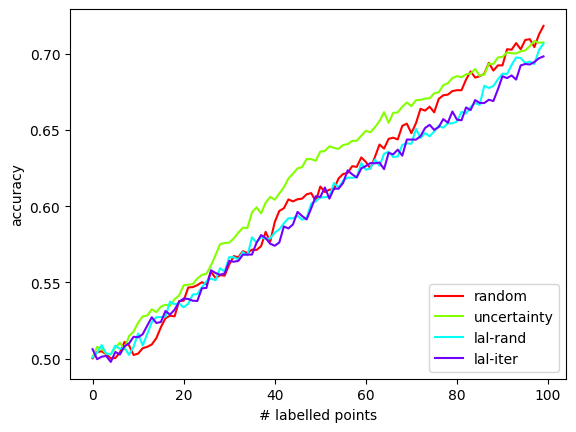

In [3]:
# number of experiment repeats
nExperiments = 20
# number of estimators (random trees) in the classifier
nEstimators = 50
# number of labeled points at the beginning of the AL experiment
nStart = 2
# number of iterations in AL experiment
nIterations = 100
# the quality metrics computed on the test set to evaluate active learners
quality_metrics = ['accuracy']

# load dataset
dtst = DatasetCheckerboard4x4()
# other possible datasets: dtst = DatasetCheckerboard4x4(), dtst = DatasetRotatedCheckerboard2x2(), dtst = DatasetStriatumMini()
# set the starting point
dtst.setStartState(nStart)
# Active learning strategies
alR = ActiveLearnerRandom(dtst, nEstimators, 'random')
alU = ActiveLearnerUncertainty(dtst, nEstimators, 'uncertainty')
alLALindepend = ActiveLearnerLAL(dtst, nEstimators, 'lal-rand', lalModel1)
alLALiterative = ActiveLearnerLAL(dtst, nEstimators, 'lal-iter', lalModel2)
als = [alR, alU, alLALindepend, alLALiterative]

exp = Experiment(nIterations, nEstimators, quality_metrics, dtst, als, 'here we can put a comment about the current experiments')
# the Results class helps to add, save and plot results of the experiments
res = Results(exp, nExperiments)

for i in range(nExperiments):
    print('\n experiment #'+str(i+1))
    # run an experiment
    performance = exp.run()
    res.addPerformance(performance)
    # reset the experiment (including sampling a new starting state for the dataset)
    exp.reset()

print()    
res.saveResults('checkerboard4x4-exp')

res2plot = Results()
res2plot.readResult('checkerboard4x4-exp')
res2plot.plotResults(metrics = ['accuracy'])


 experiment #1
........................................................................................................................................................................................................
 experiment #2
........................................................................................................................................................................................................
 experiment #3
........................................................................................................................................................................................................
 experiment #4
........................................................................................................................................................................................................
 experiment #5
........................................................................................................................

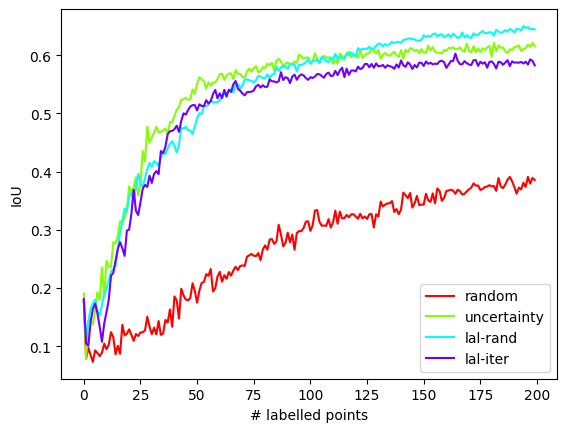

In [4]:
# number of experiment repeats
nExperiments = 20
# number of estimators (random trees) in the classifier
nEstimators = 50
# number of labeled points at the beginning of the AL experiment
nStart = 2
# number of iterations in AL experiment
nIterations = 200
# the quality metrics computed on the test set to evaluate active learners
quality_metrics = ['TP', 'TN', 'FP', 'FN']

# load dataset
dtst = DatasetStriatumMini()
# set the starting point
dtst.setStartState(nStart)
# Active learning strategies
alR = ActiveLearnerRandom(dtst, nEstimators, 'random')
alU = ActiveLearnerUncertainty(dtst, nEstimators, 'uncertainty')
alLALindepend = ActiveLearnerLAL(dtst, nEstimators, 'lal-rand', lalModel1)
alLALiterative = ActiveLearnerLAL(dtst, nEstimators, 'lal-iter', lalModel2)
als = [alR, alU, alLALindepend, alLALiterative]

exp = Experiment(nIterations, nEstimators, quality_metrics, dtst, als, 'here we can put a comment about the current experiments')
# the Results class helps to add, save and plot results of the experiments
res = Results(exp, nExperiments)

for i in range(nExperiments):
    print('\n experiment #'+str(i+1))
    # run an experiment
    performance = exp.run()
    res.addPerformance(performance)
    # reset the experiment (including sampling a new starting state for the dataset)
    exp.reset()

print()
res.saveResults('striatum-exp')
res2plot = Results()

res2plot = Results()
res2plot.readResult('striatum-exp')
res2plot.plotResults(metrics = ['IoU'])